In [1]:
import pandas as pd
import requests
import datetime
from bs4 import BeautifulSoup
import os
from tqdm import tqdm
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.cluster import KMeans
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import codecs
import csv
import itertools
import difflib
import os
import re
import unicodedata
from sklearn.cluster import KMeans
import numpy as np
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import seaborn as sns
from SECEdgar.filings import Filing
from sklearn.cluster import DBSCAN
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentPoolEmbeddings, Sentence

In [3]:
import pandas as pd
from political_utils import clustering as cl
import warnings
warnings.filterwarnings("ignore")

In [4]:
# loading cleanish data sample
lf = pd.read_csv('sample_data_vetted.csv')

In [5]:
# construct index for keeping
keep = []
for index, row in lf.iterrows():
    if row['from']>=0:
        x = range(int(row['from']), int(row['to'])+1)
    else:
        x = [int(row['Unnamed: 3'])]
    keep += x

In [6]:
len(keep)

392

# BOW and TF-IDF

Given a data frame with at least the following columns:
'publish_date', 'url', 'title', 'authors', 'article', 'drop', 'source'

We will convert text articles into bag of word vectors and tf-idf vecotrs

In [7]:
# load a data frame with required columns
df = pd.read_pickle('resources/data/cleaned_sample_Kavanaugh.pkl')

In [9]:
len(df)

4306

In [11]:
res = []
for idx, row in df.iterrows():
    if idx in keep:
#         print(idx)
        res.append(1)
    else:
        res.append(0)
df['keep'] = res

In [12]:
df = df[df['keep']==1]

In [13]:
df['to_drop'].value_counts()

False    391
Name: to_drop, dtype: int64

In [14]:
df = df.drop(['issue', 'to_drop', 'keep'], axis=1)

In [21]:
 df = df[df['article']!='']  # dirty fix

In [15]:
df = cl.bow(df, 'kav_1019')  # add bow column and save encoder
df = cl.tf_idf(df, 'kav_1019')  # add tf-idf column and save encoder

In [16]:
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentPoolEmbeddings, Sentence

# initialize the word embeddings
glove_embedding = WordEmbeddings('glove')
flair_embedding_forward = FlairEmbeddings('news-forward')
flair_embedding_backward = FlairEmbeddings('news-backward')

# initialize the document embeddings, mode = mean
document_embeddings = DocumentPoolEmbeddings([glove_embedding,
                                              flair_embedding_backward,
                                              flair_embedding_forward])

In [17]:
def embed(section):
    # create an example sentence
    sentence = Sentence(section)
    # embed the sentence with our document embedding
    document_embeddings.embed(sentence)
    # now check out the embedded sentence.
    return sentence.get_embedding()

In [22]:
len(df)

381

In [23]:
df['embedding'] = df['article'].apply(lambda x: embed(x))

In [24]:
df

,publish_date,url,title,authors,media_site,article,word_count,cue_stats,cue_stats_title,total,bow,tf-idf,embedding
0,9/20/18,https://www.americanthinker.com/articles/2018/...,Blasey Ford Must Be Acknowledged and Then Dism...,[],americanthinker.com,She released only selected portions of her the...,1266,"{'dianne feinstein': 1, 'house': 2, 'senate': ...",{'total': 0},4,"(0, 40)\t3\n (0, 49)\t1\n (0, 74)\t4\n (0...","(0, 12197)\t0.06770060683088486\n (0, 12194...","[tensor(-0.0149, grad_fn=<SelectBackward>), te..."
1,9/21/18,https://www.americanthinker.com/articles/2018/...,Dear Juanita Broaddrick,[],americanthinker.com,They want an FBI investigation of an individua...,969,"{'dianne feinstein': 2, 'bill clinton': 4, 'se...",{'total': 0},10,"(0, 90)\t1\n (0, 146)\t1\n (0, 162)\t1\n ...","(0, 12197)\t0.01684367013300037\n (0, 12194...","[tensor(-0.0173, grad_fn=<SelectBackward>), te..."
2,9/25/18,https://www.americanthinker.com/articles/2018/...,Debra Katz Was Wrong about Paula Jones's Case,[],americanthinker.com,Debra Katz Was Wrong about Paula Jones's Case\...,1444,"{'bill clinton': 1, 'hillary clinton': 1, 'tot...",{'total': 0},2,"(0, 0)\t1\n (0, 1)\t1\n (0, 89)\t3\n (0, ...","(0, 12158)\t0.03715765719045529\n (0, 12147...","[tensor(0.0237, grad_fn=<SelectBackward>), ten..."
3,9/28/18,https://www.americanthinker.com/articles/2018/...,Fake Rape Victims Are More Fun than Real Ones,[],americanthinker.com,Fake Rape Victims Are More Fun than Real Ones\...,1151,{'total': 0},{'total': 0},0,"(0, 286)\t1\n (0, 296)\t1\n (0, 316)\t1\n ...","(0, 12197)\t0.019080731753662806\n (0, 1219...","[tensor(-0.0412, grad_fn=<SelectBackward>), te..."
4,9/20/18,https://www.americanthinker.com/articles/2018/...,Ford vs. Kavanaugh: There's Nothing to Investi...,[],americanthinker.com,The problem with that is that there is nothing...,934,"{'kennedy': 1, 'house': 4, 'total': 5}",{'total': 0},5,"(0, 306)\t1\n (0, 341)\t1\n (0, 367)\t2\n ...","(0, 12223)\t0.07120982606691713\n (0, 12197...","[tensor(-0.0292, grad_fn=<SelectBackward>), te..."
5,9/19/18,https://www.americanthinker.com/articles/2018/...,Ford's Accusation against Kavanaugh Is Not Cre...,[],americanthinker.com,Now the Dems and the media say any claim of se...,1234,"{'dianne feinstein': 2, 'bill clinton': 2, 'ke...",{'total': 0},8,"(0, 40)\t2\n (0, 71)\t1\n (0, 72)\t1\n (0...","(0, 12199)\t0.049941292209762886\n (0, 1219...","[tensor(-0.0328, grad_fn=<SelectBackward>), te..."
6,9/21/18,https://www.americanthinker.com/articles/2018/...,J'accuse as the New Legal Standard,[],americanthinker.com,""" J'accuse "" was the title of an editorial pub...",1194,"{'dianne feinstein': 1, 'keith ellison': 1, 'b...",{'total': 0},11,"(0, 23)\t1\n (0, 57)\t1\n (0, 295)\t1\n (...","(0, 12197)\t0.013295926106678908\n (0, 1216...","[tensor(-0.0229, grad_fn=<SelectBackward>), te..."
7,9/25/18,https://www.americanthinker.com/articles/2018/...,Judge Kavanaugh and Sexual McCarthyism,[],americanthinker.com,McCarthy was looking for communists in the Sta...,1310,"{'dianne feinstein': 1, 'kennedy': 1, 'donald ...",{'total': 0},6,"(0, 129)\t1\n (0, 312)\t1\n (0, 344)\t1\n ...","(0, 12216)\t0.028560393195498832\n (0, 1221...","[tensor(-0.0283, grad_fn=<SelectBackward>), te..."
8,9/18/18,https://www.americanthinker.com/articles/2018/...,Judge Kavanaugh Meets His Anita Hill,[],americanthinker.com,After the Democrats prattled on about not havi...,1206,"{'chuck grassley': 1, 'bernie sanders': 1, 'di...",{'total': 0},13,"(0, 45)\t1\n (0, 52)\t1\n (0, 83)\t1\n (0...","(0, 12197)\t0.031599037817065564\n (0, 1219...","[tensor(-0.0243, grad_fn=<SelectBackward>), te..."
9,9/29/18,https://www.americanthinker.com/articles/2018/...,Kavanaugh Character Assassins Must Pay in Nove...,[],americanthinker.com,From Dianne Feinstein's withholding of Dr. For...,1326,"{'richard blumenthal': 1, 'kamala harris': 1, ...",{'total': 0},22,"(0, 1)\t3\n (0, 9)\t1\n (0, 74)\t1\n (0, ...","(0, 12213)\t0.01913581498980234\n (0, 12203...","[tensor(-0.0536, gra

In [25]:
df.to_pickle('kav_reduced_w_three_embeddings.pkl')

In [26]:
df = pd.read_pickle('kav_reduced_w_three_embeddings.pkl')

In [27]:
# help interpret clusters
def breakdown(column):
    for i in list(df[column].unique()):
        x = df[df[column]==i]
        print('CLUSTER ', str(i))
        print(x['media_site'].value_counts())
        print('===========================')

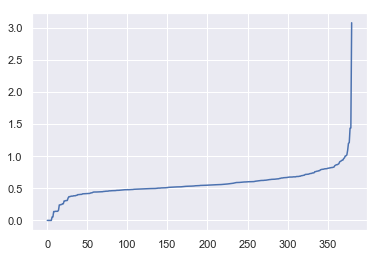

In [28]:
# some pre work for clustering
X = [ sent.detach().numpy() for sent in df['embedding']]

# obtain knee (epsilon for DBSCAN)
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

sns.set()
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [37]:
def dbscan_clustering(data, epsilon_array, data_frame, v_type, description):
    """

    :param data:
    :param cluster_array:
    :param data_frame:
    :param v_type:
    :param description:
    :return:
    """
    for c in epsilon_array:
        clustering = DBSCAN(eps=c, min_samples=2).fit(data)
        #k_means = KMeans(n_clusters=c, random_state=0).fit(data)
        type_name = v_type + '_dbscan_epsilon_' + str(c)
        data_frame[type_name] = clustering.labels_
#         name = 'resources/' + description + '_' + v_type + "_dbscan_epsilon_" + str(c) + ".pkl"
#         df = pd.DataFrame(columns=['cluster', 'center_mean'])
#         for idx, val in enumerate(clustering.cluster_centers_):
#             print('Working on K:', str(val))
#             df.loc[idx] = [idx, val]
#         df.to_pickle(name)
    return data_frame

# Creating Clusters

Given that the data has bow and tf-idf columns
We can perfrom various clustering techniques

In [30]:
# create input data array
x_tfidf = cl.sparse_matrix_to_array(df, "tf-idf")
x_bow = cl.sparse_matrix_to_array(df, "bow")
# you can ignore caveats/warnings

In [31]:
# calculate tf_idf k mean clusters for cluster sizes (3, 4 , 5, 6)
df = cl.k_means_clustering(x_tfidf, [3, 4 , 5, 6], df, "tf_idf", "kav")
# calculate bow k mean clusters for cluster sizes (3, 4 , 5, 6)
df = cl.k_means_clustering(x_bow, [3, 4 , 5, 6], df, "bow", "kav")
# calculate embedding k mean clusters for cluster sizes (3, 4 , 5, 6)
df = cl.k_means_clustering(X, [3, 4 , 5, 6], df, "embedding", "kav")

Working on K: [ 9.66734085e-04  8.92982022e-04 -3.25260652e-19 ... -5.42101086e-19
  8.13151629e-20  1.08420217e-19]
Working on K: [ 4.36824016e-03  7.89686538e-04 -4.60785923e-19 ...  8.67361738e-19
  4.06118723e-04 -8.13151629e-20]
Working on K: [6.31571816e-03 9.90595513e-03 3.72442619e-04 ... 1.50610587e-03
 8.13151629e-20 2.27543193e-04]
Working on K: [ 1.23651420e-02  5.31883047e-03 -4.33680869e-19 ...  2.66031784e-03
  8.13151629e-20 -5.42101086e-20]
Working on K: [ 1.92377878e-03  8.67361738e-19 -1.62630326e-19 ...  0.00000000e+00
  8.13151629e-20  1.35525272e-19]
Working on K: [1.93707828e-03 9.08523361e-03 4.66169901e-04 ... 1.84314369e-18
 8.13151629e-20 2.84805718e-04]
Working on K: [ 6.66287518e-04  1.39713772e-03 -2.16840434e-19 ... -2.16840434e-19
  7.18517741e-04  1.62630326e-19]
Working on K: [ 1.44908012e-03  8.92982022e-04 -3.25260652e-19 ... -5.42101086e-19
  8.13151629e-20  1.08420217e-19]
Working on K: [ 8.67361738e-19 -1.73472348e-18  5.42101086e-20 ... -1.084202

In [38]:
# calculate dbscan
df = dbscan_clustering(x_tfidf, [0.4, 0.85, 1, 1.5, 2, 3], df, "tf_idf", "kav")

df = dbscan_clustering(x_bow, [0.4, 0.85, 1, 1.5, 2, 3], df, "bow", "kav")

df = dbscan_clustering(X, [0.4, .45, 0.85, .9, 1, 1.5, 2, 3], df, "embedding", "kav")

In [33]:
df.columns

Index(['publish_date', 'url', 'title', 'authors', 'media_site', 'article',
       'word_count', 'cue_stats', 'cue_stats_title', 'total', 'bow', 'tf-idf',
       'embedding', 'tf_idf_kmeans_cluster_3', 'tf_idf_kmeans_cluster_4',
       'tf_idf_kmeans_cluster_5', 'tf_idf_kmeans_cluster_6',
       'bow_kmeans_cluster_3', 'bow_kmeans_cluster_4', 'bow_kmeans_cluster_5',
       'bow_kmeans_cluster_6', 'embedding_kmeans_cluster_3',
       'embedding_kmeans_cluster_4', 'embedding_kmeans_cluster_5',
       'embedding_kmeans_cluster_6', 'tf_idf_dbscan_epsilon_0.4',
       'tf_idf_dbscan_epsilon_0.85', 'bow_dbscan_epsilon_0.4',
       'bow_dbscan_epsilon_0.85', 'embedding_dbscan_epsilon_0.4',
       'embedding_dbscan_epsilon_0.45', 'embedding_dbscan_epsilon_0.85',
       'embedding_dbscan_epsilon_0.9'],
      dtype='object')

In [39]:
df

,publish_date,url,title,authors,media_site,article,word_count,cue_stats,cue_stats_title,total,...,tf_idf_dbscan_epsilon_2,tf_idf_dbscan_epsilon_3,bow_dbscan_epsilon_1,bow_dbscan_epsilon_1.5,bow_dbscan_epsilon_2,bow_dbscan_epsilon_3,embedding_dbscan_epsilon_1,embedding_dbscan_epsilon_1.5,embedding_dbscan_epsilon_2,embedding_dbscan_epsilon_3
0,9/20/18,https://www.americanthinker.com/articles/2018/...,Blasey Ford Must Be Acknowledged and Then Dism...,[],americanthinker.com,She released only selected portions of her the...,1266,"{'dianne feinstein': 1, 'house': 2, 'senate': ...",{'total': 0},4,...,0,0,-1,-1,-1,-1,0,0,0,0
1,9/21/18,https://www.americanthinker.com/articles/2018/...,Dear Juanita Broaddrick,[],americanthinker.com,They want an FBI investigation of an individua...,969,"{'dianne feinstein': 2, 'bill clinton': 4, 'se...",{'total': 0},10,...,0,0,-1,-1,-1,-1,0,0,0,0
2,9/25/18,https://www.americanthinker.com/articles/2018/...,Debra Katz Was Wrong about Paula Jones's Case,[],americanthinker.com,Debra Katz Was Wrong about Paula Jones's Case\...,1444,"{'bill clinton': 1, 'hillary clinton': 1, 'tot...",{'total': 0},2,...,0,0,-1,-1,-1,-1,0,0,0,0
3,9/28/18,https://www.americanthinker.com/articles/2018/...,Fake Rape Victims Are More Fun than Real Ones,[],americanthinker.com,Fake Rape Victims Are More Fun than Real Ones\...,1151,{'total': 0},{'total': 0},0,...,0,0,-1,-1,-1,-1,0,0,0,0
4,9/20/18,https://www.americanthinker.com/articles/2018/...,Ford vs. Kavanaugh: There's Nothing to Investi...,[],americanthinker.com,The problem with that is that there is nothing...,934,"{'kennedy': 1, 'house': 4, 'total': 5}",{'total': 0},5,...,0,0,-1,-1,-1,-1,0,0,0,0
5,9/19/18,https://www.americanthinker.com/articles/2018/...,Ford's Accusation against Kavanaugh Is Not Cre...,[],americanthinker.com,Now the Dems and the media say any claim of se...,1234,"{'dianne feinstein': 2, 'bill clinton': 2, 'ke...",{'total': 0},8,...,0,0,-1,-1,-1,-1,0,0,0,0
6,9/21/18,https://www.americanthinker.com/articles/2018/...,J'accuse as the New Legal Standard,[],americanthinker.com,""" J'accuse "" was the title of an editorial pub...",1194,"{'dianne feinstein': 1, 'keith ellison': 1, 'b...",{'total': 0},11,...,0,0,-1,-1,-1,-1,0,0,0,0
7,9/25/18,https://www.americanthinker.com/articles/2018/...,Judge Kavanaugh and Sexual McCarthyism,[],americanthinker.com,McCarthy was looking for communists in the Sta...,1310,"{'dianne feinstein': 1, 'kennedy': 1, 'donald ...",{'total': 0},6,...,0,0,-1,-1,-1,-1,0,0,0,0
8,9/18/18,https://www.americanthinker.com/articles/2018/...,Judge Kavanaugh Meets His Anita Hill,[],americanthinker.com,After the Democrats prattled on about not havi...,1206,"{'chuck grassley': 1, 'bernie sanders': 1, 'di...",{'total': 0},13,...,0,0,-1,-1,-1,-1,0,0,0,0
9,9/29/18,https://www.americanthinker.com/articles/2018/...,Kavanaugh Character Assassins Must Pay in Nove...,[],americanthinker.com,From Dianne Feinstein's withholding of Dr. For...,1326,"{'richard blumenthal': 1, 'kamala harris': 1, ...",{'total': 0},22,...,0,0,-1,-1,-1,-1,0,0,0,0


In [45]:
breakdown('embedding_dbscan_epsilon_0.4')

CLUSTER  -1
Breitbart                    11
Hot Air                      11
Western Journalism Center    11
NewsMax                      11
frontpagemag.com             11
The Blaze                    11
thefederalist.com            11
Free Beacon                  11
Right Scoop                  11
thepoliticalinsider.com      11
FOX News                     11
Wall Street Journal          11
americanthinker.com          11
Washington Times             11
townhall.com                 10
Daily Wire                   10
GatewayPundit                10
weeklystandard.com           10
Washington Examiner          10
conservativereview.com       10
InfoWars                     10
PJMedia                      10
National Review               9
WorldNetDaily                 9
conservativetribune.com       9
pamelageller.com              9
CNS News                      9
NY Post                       9
The American Spectator        9
Zero Hedge                    8
bigleaguepolitics.com       

In [36]:
df.to_pickle('resources/data/102019_kav_clusters.pkl')

In [40]:
df

,publish_date,url,title,authors,media_site,article,word_count,cue_stats,cue_stats_title,total,...,tf_idf_dbscan_epsilon_2,tf_idf_dbscan_epsilon_3,bow_dbscan_epsilon_1,bow_dbscan_epsilon_1.5,bow_dbscan_epsilon_2,bow_dbscan_epsilon_3,embedding_dbscan_epsilon_1,embedding_dbscan_epsilon_1.5,embedding_dbscan_epsilon_2,embedding_dbscan_epsilon_3
0,9/20/18,https://www.americanthinker.com/articles/2018/...,Blasey Ford Must Be Acknowledged and Then Dism...,[],americanthinker.com,She released only selected portions of her the...,1266,"{'dianne feinstein': 1, 'house': 2, 'senate': ...",{'total': 0},4,...,0,0,-1,-1,-1,-1,0,0,0,0
1,9/21/18,https://www.americanthinker.com/articles/2018/...,Dear Juanita Broaddrick,[],americanthinker.com,They want an FBI investigation of an individua...,969,"{'dianne feinstein': 2, 'bill clinton': 4, 'se...",{'total': 0},10,...,0,0,-1,-1,-1,-1,0,0,0,0
2,9/25/18,https://www.americanthinker.com/articles/2018/...,Debra Katz Was Wrong about Paula Jones's Case,[],americanthinker.com,Debra Katz Was Wrong about Paula Jones's Case\...,1444,"{'bill clinton': 1, 'hillary clinton': 1, 'tot...",{'total': 0},2,...,0,0,-1,-1,-1,-1,0,0,0,0
3,9/28/18,https://www.americanthinker.com/articles/2018/...,Fake Rape Victims Are More Fun than Real Ones,[],americanthinker.com,Fake Rape Victims Are More Fun than Real Ones\...,1151,{'total': 0},{'total': 0},0,...,0,0,-1,-1,-1,-1,0,0,0,0
4,9/20/18,https://www.americanthinker.com/articles/2018/...,Ford vs. Kavanaugh: There's Nothing to Investi...,[],americanthinker.com,The problem with that is that there is nothing...,934,"{'kennedy': 1, 'house': 4, 'total': 5}",{'total': 0},5,...,0,0,-1,-1,-1,-1,0,0,0,0
5,9/19/18,https://www.americanthinker.com/articles/2018/...,Ford's Accusation against Kavanaugh Is Not Cre...,[],americanthinker.com,Now the Dems and the media say any claim of se...,1234,"{'dianne feinstein': 2, 'bill clinton': 2, 'ke...",{'total': 0},8,...,0,0,-1,-1,-1,-1,0,0,0,0
6,9/21/18,https://www.americanthinker.com/articles/2018/...,J'accuse as the New Legal Standard,[],americanthinker.com,""" J'accuse "" was the title of an editorial pub...",1194,"{'dianne feinstein': 1, 'keith ellison': 1, 'b...",{'total': 0},11,...,0,0,-1,-1,-1,-1,0,0,0,0
7,9/25/18,https://www.americanthinker.com/articles/2018/...,Judge Kavanaugh and Sexual McCarthyism,[],americanthinker.com,McCarthy was looking for communists in the Sta...,1310,"{'dianne feinstein': 1, 'kennedy': 1, 'donald ...",{'total': 0},6,...,0,0,-1,-1,-1,-1,0,0,0,0
8,9/18/18,https://www.americanthinker.com/articles/2018/...,Judge Kavanaugh Meets His Anita Hill,[],americanthinker.com,After the Democrats prattled on about not havi...,1206,"{'chuck grassley': 1, 'bernie sanders': 1, 'di...",{'total': 0},13,...,0,0,-1,-1,-1,-1,0,0,0,0
9,9/29/18,https://www.americanthinker.com/articles/2018/...,Kavanaugh Character Assassins Must Pay in Nove...,[],americanthinker.com,From Dianne Feinstein's withholding of Dr. For...,1326,"{'richard blumenthal': 1, 'kamala harris': 1, ...",{'total': 0},22,...,0,0,-1,-1,-1,-1,0,0,0,0


In [12]:
df.head()

,publish_date,url,title,authors,media_site,article,issue,to_drop,bow,tf-idf,tf_idf_kmeans_cluster_3,tf_idf_kmeans_cluster_4,tf_idf_kmeans_cluster_5,tf_idf_kmeans_cluster_6,tf_idf_kmeans_cluster_7,tf_idf_kmeans_cluster_8,tf_idf_kmeans_cluster_9,tf_idf_kmeans_cluster_10,tf_idf_kmeans_cluster_11,tf_idf_kmeans_cluster_12
0,9/20/18,https://www.americanthinker.com/articles/2018/...,Blasey Ford Must Be Acknowledged and Then Dism...,[],americanthinker.com,She released only selected portions of her the...,False,False,"(0, 211)\t3\n (0, 242)\t1\n (0, 345)\t4\n ...","(0, 35600)\t0.06286744488003601\n (0, 35596...",0,2,4,2,2,2,3,9,0,2
1,9/21/18,https://www.americanthinker.com/articles/2018/...,Dear Juanita Broaddrick,[],americanthinker.com,They want an FBI investigation of an individua...,False,False,"(0, 365)\t1\n (0, 595)\t1\n (0, 650)\t1\n ...","(0, 35600)\t0.01571572018496813\n (0, 35596...",0,3,0,0,0,6,4,9,5,2
2,9/25/18,https://www.americanthinker.com/articles/2018/...,Debra Katz Was Wrong about Paula Jones's Case,[],americanthinker.com,Debra Katz Was Wrong about Paula Jones's Case\...,False,False,"(0, 0)\t1\n (0, 1)\t1\n (0, 364)\t3\n (0,...","(0, 35382)\t0.034006627036144224\n (0, 3536...",0,3,0,0,0,6,4,3,5,0
3,9/28/18,https://www.americanthinker.com/articles/2018/...,Fake Rape Victims Are More Fun than Real Ones,[],americanthinker.com,Fake Rape Victims Are More Fun than Real Ones\...,False,False,"(0, 1244)\t1\n (0, 1294)\t1\n (0, 1378)\t1...","(0, 35600)\t0.017310506643968753\n (0, 3559...",0,3,0,0,0,6,4,3,5,0
4,9/20/18,https://www.americanthinker.com/articles/2018/...,Ford vs. Kavanaugh: There's Nothing to Investi...,[],americanthinker.com,The problem with that is that there is nothing...,False,False,"(0, 1342)\t1\n (0, 1434)\t1\n (0, 1475)\t2...","(0, 35702)\t0.09225101301927166\n (0, 35600...",0,3,0,0,0,2,3,9,3,2


In [13]:
df.to_pickle('resources/data/df_kav_w_tfidf_072119.pkl')

# Media Level

In [3]:
df = pd.read_pickle('resources/data/df_kav_w_tfidf_072119.pkl')

In [4]:
# combine articles on source
nf = cl.combine_on_source(df)

In [5]:
nf.head()

,media_site,article,number_or_articles,list_of_urls,num_grams
0,Washington Times,ANALYSIS/OPINION:\n\nLook at what’s going on w...,472,[http://www.washingtontimes.com/news/2018/sep/...,308395
1,FOX News,UPDATE: The formerly anonymous accuser identif...,429,[http://insider.foxnews.com/2018/09/16/brett-k...,376134
2,townhall.com,"UPDATE: Sen. Donnelly (D-IN) is a ""no"" vote. F...",386,[https://townhall.com/tipsheet/mattvespa/2018/...,174512
3,Daily Caller,"D e b r a K a t z , o n e o f t h e ...",233,[https://dailycaller.com/2018/09/21/kavanaugh-...,196288
4,Daily Wire,A woman that Christine Blasey Ford claimed was...,225,[https://www.dailywire.com/news/36744/witness-...,160554


In [6]:
nf = cl.bow(nf, '_1Source_kav_0719')  # add bow column and save encoder
nf = cl.tf_idf(nf, '1_Source_kav_0719')  # add tf-idf column and save encoder

In [7]:
# create input data array
n_tfidf = cl.sparse_matrix_to_array(nf, "tf-idf")
n_bow = cl.sparse_matrix_to_array(nf, "bow")

In [17]:
# calculate tf_idf k mean clusters for cluster sizes (6,7)
nf = cl.k_means_clustering(n_tfidf, [3, 4 , 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], nf, "tf_idf", 'media-level')

Working on K: [1.46817588e-02 5.45964050e-03 1.35525272e-20 ... 9.02107353e-05
 9.02107353e-05 9.02107353e-05]
Working on K: [1.92606075e-03 4.67043909e-03 1.36959680e-04 ... 6.77626358e-21
 6.77626358e-21 6.77626358e-21]
Working on K: [0.00552675 0.01096814 0.         ... 0.         0.         0.        ]
Working on K: [0.         0.01936956 0.         ... 0.         0.         0.        ]
Working on K: [6.00140852e-03 4.60757845e-03 1.01741477e-04 ... 6.77626358e-21
 6.77626358e-21 6.77626358e-21]
Working on K: [0.00152763 0.00085266 0.         ... 0.00099232 0.00099232 0.00099232]
Working on K: [0.00552675 0.01096814 0.         ... 0.         0.         0.        ]
Working on K: [0.         0.00770764 0.         ... 0.         0.         0.        ]
Working on K: [1.31211908e-03 4.86099437e-03 1.87418510e-04 ... 3.38813179e-21
 3.38813179e-21 3.38813179e-21]
Working on K: [1.32227883e-02 4.65378617e-03 0.00000000e+00 ... 6.77626358e-21
 6.77626358e-21 6.77626358e-21]
Working on K: [

Working on K: [2.69814789e-04 5.48907217e-03 1.35525272e-20 ... 3.38813179e-21
 3.38813179e-21 3.38813179e-21]
Working on K: [0.00152763 0.00085266 0.         ... 0.00099232 0.00099232 0.00099232]
Working on K: [3.41547995e-03 4.59888865e-03 2.22559480e-04 ... 6.77626358e-21
 6.77626358e-21 6.77626358e-21]
Working on K: [0.         0.01936956 0.         ... 0.         0.         0.        ]
Working on K: [0.14243384 0.00271796 0.         ... 0.         0.         0.        ]
Working on K: [0.00552675 0.01096814 0.         ... 0.         0.         0.        ]
Working on K: [0. 0. 0. ... 0. 0. 0.]
Working on K: [0.         0.00455555 0.         ... 0.         0.         0.        ]
Working on K: [0. 0. 0. ... 0. 0. 0.]
Working on K: [0. 0. 0. ... 0. 0. 0.]
Working on K: [0.         0.00375335 0.         ... 0.         0.         0.        ]
Working on K: [0.0068122  0.01267424 0.         ... 0.         0.         0.        ]
Working on K: [0. 0. 0. ... 0. 0. 0.]
Working on K: [0.       

In [9]:
nf

,media_site,article,number_or_articles,list_of_urls,num_grams,bow,tf-idf,tf_idf_kmeans_cluster_3,tf_idf_kmeans_cluster_4,tf_idf_kmeans_cluster_5,tf_idf_kmeans_cluster_6,tf_idf_kmeans_cluster_7,tf_idf_kmeans_cluster_8,tf_idf_kmeans_cluster_9
0,Washington Times,ANALYSIS/OPINION:\n\nLook at what’s going on w...,472,[http://www.washingtontimes.com/news/2018/sep/...,308395,"(0, 0)\t1\n (0, 1)\t66\n (0, 9)\t1\n (0, ...","(0, 35853)\t0.00030153092211904317\n (0, 35...",1,1,1,5,0,6,5
1,FOX News,UPDATE: The formerly anonymous accuser identif...,429,[http://insider.foxnews.com/2018/09/16/brett-k...,376134,"(0, 0)\t4\n (0, 1)\t64\n (0, 4)\t2\n (0, ...","(0, 35887)\t0.0028563693915613147\n (0, 358...",1,1,1,5,0,6,5
2,townhall.com,"UPDATE: Sen. Donnelly (D-IN) is a ""no"" vote. F...",386,[https://townhall.com/tipsheet/mattvespa/2018/...,174512,"(0, 0)\t16\n (0, 1)\t11\n (0, 3)\t1\n (0,...","(0, 35863)\t0.0009586330004674638\n (0, 358...",1,1,1,5,0,1,1
3,Daily Caller,"D e b r a K a t z , o n e o f t h e ...",233,[https://dailycaller.com/2018/09/21/kavanaugh-...,196288,"(0, 0)\t1\n (0, 1)\t23\n (0, 10)\t1\n (0,...","(0, 35899)\t0.002045547403578557\n (0, 3583...",1,1,1,0,0,1,5
4,Daily Wire,A woman that Christine Blasey Ford claimed was...,225,[https://www.dailywire.com/news/36744/witness-...,160554,"(0, 1)\t16\n (0, 32)\t1\n (0, 67)\t26\n (...","(0, 35895)\t0.0014951954041274504\n (0, 358...",1,1,2,5,0,1,5
5,Breitbart,The Senate Judiciary Committee on Wednesday re...,220,[http://feedproxy.google.com/~r/breitbart/~3/2...,136191,"(0, 0)\t38\n (0, 1)\t14\n (0, 5)\t2\n (0,...","(0, 35890)\t0.0010884075380512676\n (0, 358...",1,1,2,0,4,1,5
6,Washington Examiner,President Donald Trump mocked Christine Blasey...,204,[https://www.washingtonexaminer.com/news/white...,95326,"(0, 1)\t9\n (0, 67)\t26\n (0, 68)\t13\n (...","(0, 35852)\t0.003082316102136659\n (0, 3583...",1,1,1,5,0,6,5
7,Twitchy,"Well, this is certainly an interesting turn of...",199,[https://twitchy.com/sarahd-313035/2018/09/18/...,93107,"(0, 0)\t4\n (0, 1)\t3\n (0, 5)\t1\n (0, 7...","(0, 35912)\t0.000992318087896462\n (0, 3591...",0,2,3,3,2,5,4
8,NY Post,'Tiger Mom's' daughter to clerk for Kavanaugh ...,188,"[https://nypost.com/tag/brett-kavanaugh/, http...",79123,"(0, 0)\t2\n (0, 1)\t21\n (0, 26)\t1\n (0,...","(0, 35896)\t0.001779718539609211\n (0, 3587...",1,1,1,5,0,6,5
9,Free Beacon,BY:\n\n\n\nEmails sent last week by a friend o...,158,[https://freebeacon.com/politics/friend-ford-l...,81409,"(0, 1)\t12\n (0, 12)\t1\n (0, 14)\t1\n (0...","(0, 35859)\t0.0011919832761797169\n (0, 358...",1,1,1,5,0,6,5


In [10]:
# Washington Times top 30 word
x = cl.return_top_tfidf_words_array(n_tfidf[0] , 'tf-idf_encoder_1_Source_kav_0719.pkl' )

In [11]:
x

[('hearing', 0.07213301290804097),
 ('christine', 0.0728679926611069),
 ('party', 0.07303718287736928),
 ('high', 0.07389897854553883),
 ('sen', 0.07691526338413225),
 ('president', 0.07885430363751374),
 ('republican', 0.07885430363751374),
 ('republicans', 0.07958780754628102),
 ('judiciary', 0.08105776705241285),
 ('nominee', 0.08378769184951484),
 ('vote', 0.08788257904516783),
 ('mr', 0.0897344739481543),
 ('democrats', 0.08998252119678474),
 ('brett', 0.10195219146100115),
 ('sexual', 0.10923260094049034),
 ('fbi', 0.10930198899166034),
 ('says', 0.10944804985753272),
 ('supreme', 0.11066695139021133),
 ('allegations', 0.11129693403569642),
 ('blasey', 0.12274161876200859),
 ('ms', 0.12301382117725701),
 ('committee', 0.13891117332945882),
 ('court', 0.1430060605251118),
 ('trump', 0.14479101135398617),
 ('senate', 0.15455574235900482),
 ('___', 0.17330523886821855),
 ('judge', 0.18216998165276724),
 ('ford', 0.29525186651733804),
 ('said', 0.338825666163389),
 ('kavanaugh', 0.49

In [29]:
x = 'tf_idf_kmeans_cluster_9'
num = int(x.split('_')[-1])
for i in range(num):
    print('CLUSTER ', str(i))
    print('------------')
    for idx, val in enumerate(list(nf[x])):
        if val == i:
            print(nf['media_site'][idx])
    print('============================')  

CLUSTER  0
------------
GatewayPundit
thepoliticalinsider.com
InfoWars
Right Scoop
CLUSTER  1
------------
townhall.com
americanthinker.com
thefederalist.com
The American Spectator
conservativereview.com
CLUSTER  2
------------
whatreallyhappened
CLUSTER  3
------------
bigleaguepolitics.com
CLUSTER  4
------------
Twitchy
CLUSTER  5
------------
Washington Times
FOX News
Daily Caller
Daily Wire
Breitbart
Washington Examiner
NY Post
Free Beacon
Hot Air  
NewsMax
The Blaze
Zero Hedge
CNS News
PJMedia
Wall Street Journal
weeklystandard.com
National Review
pamelageller.com
Michael Savage
Jerusalem Post
WorldNetDaily
CLUSTER  6
------------
conservativetribune.com
Western Journalism Center
CLUSTER  7
------------
frontpagemag.com
CLUSTER  8
------------
Conservative Treehouse
intellihub.com


In [11]:
n_tfidf[0]   # zero will be Washington Times, first in medial level data frame

array([0.00015739, 0.00785347, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [47]:
def return_top_tfidf_words_array(array, encoder):
    """
    top 30 on entire corpus
    :param array:
    :return:
    """
    load = open('resources/' + encoder, 'rb')
    encoder = pickle.load(load)
    load.close()
    tfidf_dict = {}
    encoder = dict([[v, k] for k,v in encoder.items()])
    for idx, a in enumerate(array):
        tfidf_dict[encoder[idx]] = a
    sorted_dict = sorted(x.items(), key=operator.itemgetter(1))
    return sorted_dict[-30:]

In [46]:
x = return_top_tfidf_words_array(n_tfidf[0] , 'tf-idf_encoder_1_Source_kav_0719.pkl' )

00


In [43]:
import operator

sorted_x = sorted(x.items(), key=operator.itemgetter(1))

In [48]:
x

[('hearing', 0.07248823518196691),
 ('christine', 0.07322683437596075),
 ('party', 0.07326864799511508),
 ('high', 0.07413317481511643),
 ('sen', 0.07715901868512119),
 ('president', 0.07910420403012425),
 ('republican', 0.07910420403012425),
 ('republicans', 0.07997974129247587),
 ('judiciary', 0.08145693968046355),
 ('nominee', 0.08420030811529781),
 ('vote', 0.08831536076754921),
 ('mr', 0.09001885513264138),
 ('democrats', 0.09042564417896018),
 ('brett', 0.10245425962400273),
 ('sexual', 0.1095787744351721),
 ('says', 0.10979490614017244),
 ('fbi', 0.10984025156394112),
 ('supreme', 0.11121193578135825),
 ('allegations', 0.11184502080478155),
 ('ms', 0.12319305860067421),
 ('blasey', 0.12334606539697135),
 ('committee', 0.13959524766483583),
 ('trump', 0.14207436424578504),
 ('court', 0.14371030031708723),
 ('senate', 0.1553168590798476),
 ('___', 0.16551323909802404),
 ('judge', 0.17875201012794564),
 ('ford', 0.2967058476443828),
 ('said', 0.34049422843116045),
 ('kavanaugh', 0.

In [42]:
nf[nf['media_site'] == 'WJLA']

,media_site,article,number_or_articles,list_of_urls,num_grams,bow,tf-idf,tf_idf_kmeans_cluster_3,tf_idf_kmeans_cluster_4,tf_idf_kmeans_cluster_5,tf_idf_kmeans_cluster_6,tf_idf_kmeans_cluster_7,tf_idf_kmeans_cluster_8,tf_idf_kmeans_cluster_9
19,WJLA,...,72,[https://wjla.com/news/nation-world/accusers-s...,201,"(0, 163)\t1\n (0, 421)\t1\n (0, 1184)\t1\n...","(0, 35596)\t0.09674385485195008\n (0, 35221...",2,1,1,1,6,1,1


In [43]:
df[df['media_site']=='WJLA']

,publish_date,url,title,authors,media_site,article,issue,to_drop,bow,tf-idf,tf_idf_kmeans_cluster_3,tf_idf_kmeans_cluster_4,tf_idf_kmeans_cluster_5,tf_idf_kmeans_cluster_6,tf_idf_kmeans_cluster_7,tf_idf_kmeans_cluster_8,tf_idf_kmeans_cluster_9,tf_idf_kmeans_cluster_10,tf_idf_kmeans_cluster_11,tf_idf_kmeans_cluster_12
4246,9/17/18,https://wjla.com/news/nation-world/accusers-st...,NaN,"[Darlene Superville, Lisa Mascaro, Associated ...",WJLA,,False,False,,,0,3,4,3,1,1,7,0,2,2
4247,9/17/18,https://wjla.com/news/nation-world/white-house...,NaN,"[Eric Lieberman, Sinclair Broadcast Group]",WJLA,,False,False,,,0,3,4,3,1,1,7,0,2,2
4248,9/17/18,https://wjla.com/news/nation-world/senators-co...,NaN,[Leandra Bernstein],WJLA,,False,False,,,0,3,4,3,1,1,7,0,2,2
4249,9/17/18,https://wjla.com/news/nation-world/feinstein-s...,NaN,"[Alan Fram, Lisa Mascaro, Associated Press]",WJLA,,False,False,,,0,3,4,3,1,1,7,0,2,2
4250,9/17/18,https://wjla.com/news/nation-world/kavanaugh-g...,NaN,[The Associated Press],WJLA,,False,False,,,0,3,4,3,1,1,7,0,2,2
4251,9/18/18,https://wjla.com/news/nation-world/report-kava...,NaN,"[Eric Lieberman, Sinclair Broadcast Group]",WJLA,,False,False,,,0,3,4,3,1,1,7,0,2,2
4252,9/18/18,https://wjla.com/news/nation-world/report-man-...,NaN,"[Eric Lieberman, Sinclair Broadcast Group]",WJLA,,False,False,,,0,3,4,3,1,1,7,0,2,2
4253,9/18/18,https://wjla.com/news/nation-world/showdown-be...,NaN,"[Alan Fram, Lisa Mascaro, Associated Press]",WJLA,,False,False,,,0,3,4,3,1,1,7,0,2,2
4254,9/18/18,https://wjla.com/news/nation-world/kavanaugh-a...,NaN,[Leandra Bernstein],WJLA,,False,False,,,0,3,4,3,1,1,7,0,2,2
4255,9/18/18,https://wjla.com/news/nation-world/showdown-he...,NaN,"[Alan Fram, Lisa Mascaro, The Associated Press]",WJLA,,False,False,,,0,3,4,3,1,1,7,0,2,2


In [194]:
df['tf_idf_kmeans_cluster_9'].value_counts()

5    1687
7     531
2     506
4     492
3     370
1     315
0     267
8     147
6     140
Name: tf_idf_kmeans_cluster_9, dtype: int64

In [49]:
n_tfidf[0]

array([0.00015739, 0.00785347, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [3]:
import pickle

yyy = pickle.load( open( "resources/tf-idf_encoder_1_Source_kav_0719.pkl", "rb" ) )

In [59]:
yyy

{'analysis': 2339,
 'opinion': 22768,
 'look': 19408,
 'going': 13950,
 'judge': 17705,
 'brett': 4913,
 'kavanaugh': 17972,
 'confirmation': 7298,
 'proceedings': 25031,
 'supreme': 31139,
 'court': 7891,
 'fingerprints': 12543,
 'george': 13684,
 'soros': 29854,
 'report': 26798,
 'june': 17762,
 'daily': 8412,
 'caller': 5450,
 'new': 21918,
 'political': 24390,
 'advocacy': 1754,
 'group': 14318,
 'vowed': 34454,
 'million': 20805,
 'effort': 10744,
 'stop': 30621,
 'significant': 29208,
 'ties': 32219,
 'liberal': 19056,
 'financier': 12524,
 'demand': 8986,
 'justice': 17788,
 'established': 11474,
 '2018': 418,
 'gets': 13727,
 'money': 21191,
 'sixteen': 29328,
 'thirty': 32083,
 'fund': 13308,
 'received': 26214,
 'roughly': 27632,
 'open': 22741,
 'society': 29724,
 'policy': 24383,
 'center': 5931,
 'outlets': 22979,
 'years': 35600,
 '2012': 412,
 '2016': 416,
 'entire': 11252,
 'mission': 21004,
 'advance': 1719,
 'progressive': 25116,
 'agenda': 1855,
 'courts': 7902,
 'g

In [60]:
for k,v in yyy.items():
    if int(v)==7891:
        print(k)

court


In [61]:
len(n_tfidf[0])

35919

In [25]:
# load cluster 9 means
df_9 = pd.read_pickle('resources/media-level_tf_idf_cluster_centers_9.pkl')
df_9 = cl.top_words(df_11, 'center_mean', 'tf-idf_encoder_1_Source_kav_0719.pkl')
# df_6.to_pickle('resources/some_name.pkl')

In [26]:
df_9

,cluster,center_mean,results_for_tfidf
0,0,"[0.004384470002730279, 0.006062857424683675, 0...","{'accuser': 0.05545889383926111, 'thepolitical..."
1,1,"[0.0034057372219891556, 0.005741476637131035, ...","{'know': 0.05920413805815436, 'just': 0.062479..."
2,2,"[0.0, 0.019369560660431717, 0.0, 0.0, 0.0, 0.0...","{'baker': 0.07421658194221498, 'blessing': 0.0..."
3,3,"[0.0055267467379803955, 0.010968141788398516, ...","{'brett': 0.07113081772359109, 'immediately': ..."
4,4,"[0.0015276278722663227, 0.0008526554989961637,...","{'did': 0.04436067549582436, 'letter': 0.04648..."
5,5,"[0.00835632057641933, 0.004544856903544669, 0....","{'time': 0.05767525134816448, 'high': 0.059447..."
6,6,"[0.0, 0.004555545777744907, 0.0, 0.0, 0.0, 0.0...","{'party': 0.07602906091363912, 'updates': 0.07..."
7,7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","{'believe': 0.07231601792173398, 'democrat': 0..."
8,8,"[0.0, 0.0018766731810820466, 0.0, 0.0, 0.0, 0....","{'statement': 0.05429971779584194, 'nominee': ..."


In [28]:
df_9['results_for_tfidf'][0]

{'accuser': 0.05545889383926111,
 'thepoliticalinsider': 0.0561125709796768,
 'investigation': 0.057845984656696436,
 'feinstein': 0.05884098333885537,
 'sexual': 0.0622572514836296,
 'school': 0.0635433940552772,
 'testify': 0.06384240420597209,
 'com': 0.0666694999373583,
 'fbi': 0.06779821699099586,
 'assault': 0.06791448902954134,
 'letter': 0.07029874776553979,
 'hearing': 0.07366831984422237,
 'dr': 0.07432481352914581,
 'supreme': 0.07435468064155552,
 'party': 0.07979962692399624,
 'democrats': 0.0809605307511598,
 'court': 0.08634795772988714,
 'allegations': 0.08777355703111826,
 'judge': 0.09144543972454033,
 'september': 0.09364080127893674,
 'judiciary': 0.09732874335886885,
 'said': 0.106298852625578,
 '2018': 0.1170045109202682,
 'brett': 0.1211925713577048,
 'committee': 0.12453213073206873,
 'senate': 0.13721555952591344,
 'blasey': 0.16090599727484606,
 'christine': 0.17397001733497824,
 'kavanaugh': 0.41819818902900713,
 'ford': 0.492261259191186}

In [23]:
# load cluster 7 
df_7 = pd.read_pickle('resources/tf_idf_cluster_centers_7.pkl')
df_7 = cl.top_words(df_7, 'center_mean')
# df_7.to_pickle('resources/some_name.pkl')

In [ ]:
# feel free to do bow too if you want and load the other cluster pckles to see the top 30 words

In [15]:
df.to_pickle('resources/kmeans_tfidf_3_10.pkl')

In [3]:
df = pd.read_pickle('resources/kmeans_tfidf_3_10.pkl')

In [13]:
tf = df[['url', 'source', 'article', 'tf_idf_kmeans_cluster_7']]

In [14]:
tf[tf['source']=='ww']

,url,source,article,tf_idf_kmeans_cluster_7
4240,http://ww.whatreallyhappened.com/ko/content/an...,ww,"Rachel Mitchell, a deputy Maricopa County att...",6
4245,http://ww.whatreallyhappened.com/ko/content/mi...,ww,The audience laughed as Trump ran through a l...,6


In [180]:
tf['article'][59]

'Have a hot tip for Big League Politics?\n\nGot a hot news tip for us? Photos or video of a breaking story? Send your tips, photos and videos to tips@bigleaguepolitics.com. All hot tips are immediately forwarded to BLP Staff.\n\nHave something to say? Send your own guest column or original reporting to submissions@bigleaguepolitics.com.'

In [21]:
tf[tf['tf_idf_kmeans_cluster_7']==6]['source'].value_counts()

washingtontimes             220
feedproxy                   160
dailycaller                 149
townhall                    110
dailywire                   105
foxnews                     100
nypost                       73
hotair                       73
washingtonexaminer           66
insider                      60
freebeacon                   57
thegatewaypundit             57
newsmax                      54
americanthinker              52
theblaze                     47
cnsnews                      47
pjmedia                      47
westernjournal               46
feeds                        46
thepoliticalinsider          41
truthfeednews                37
bigleaguepolitics            34
thefederalist                31
wjla                         26
spectator                    25
weeklystandard               24
nationalreview               24
infowars                     22
Newsmax                      21
                             19
gellerreport                 16
wnd     

In [8]:
# todo, after we look at k_means we can try dbscan
# # dbscan, will probably need to run overnight
# for i in np.linspace(0,5,51):
#     db = DBSCAN(eps=i, min_samples=2, metric='euclidean').fit(x)
#     df['tfidf_' + str(i)[0:3] + '_dbscan_cluster'] = db.labels_

In [4]:
df.head()

,publish_date,url,title,authors,article,drop,source
0,None,https://www.americanthinker.com/articles/2018/...,Blasey Ford Must Be Acknowledged and Then Dism...,[],She released only selected portions of her the...,keep,americanthinker
1,None,https://www.americanthinker.com/articles/2018/...,Dear Juanita Broaddrick,[],They want an FBI investigation of an individua...,keep,americanthinker
2,None,https://www.americanthinker.com/articles/2018/...,Debra Katz Was Wrong about Paula Jones's Case,[],Debra Katz Was Wrong about Paula Jones's Case\...,keep,americanthinker
3,None,https://www.americanthinker.com/articles/2018/...,Fake Rape Victims Are More Fun than Real Ones,[],Fake Rape Victims Are More Fun than Real Ones\...,keep,americanthinker
4,None,https://www.americanthinker.com/articles/2018/...,Ford vs. Kavanaugh: There's Nothing to Investi...,[],The problem with that is that there is nothing...,keep,americanthinker


In [15]:
def get_full(url):
    try:
        # url = 'https://clearthis.page/?u=' + url
        r = requests.get(url)
        data = r.text
    except Exception as e:
        data = e
    return data

In [16]:
tqdm.pandas()

df['article_3'] = df['url'].progress_apply(lambda x: get_full(x))

100%|██████████| 4455/4455 [1:02:55<00:00,  1.33s/it] 


In [19]:
df['article_3'][4454]

'<!DOCTYPE html>\n<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">\n  <head>\n    <meta charset="utf-8" />\n<meta name="title" content="45 Questions You Are Unlikely To Hear Asked Of Christine Blasey Ford" />\n<meta name="twitter:card" content="summary_large_image" />\n<meta property="og:site_name" content="Zero Hedge" />\n<meta name="twitter:site" content="@zerohedge" />\n<meta name="twitter:description" content="Our GOP senators are more concerned with their reputations in the Beltway Bubble, while Normal people just want to get at the truth..." />\n<meta name="description" content="Our GOP senators are more concerned with their reputation

In [18]:
df.tail()

,publish_date,url,title,authors,article,drop,source,article_2,article_3
4450,None,http://feedproxy.google.com/~r/zerohedge/feed/...,The Case For Abandoning Brett Kavanaugh,[],President Trump's grand bargain with his evang...,keep,feedproxy,None shall pass,"<!DOCTYPE html>\n<html lang=""en"" dir=""ltr"" pre..."
4451,None,http://feedproxy.google.com/~r/zerohedge/feed/...,Kavanaugh Carnival Continues: Exposing Ford's ...,[],"Authored by Mike Shedlock via MishTalk,\n\nThe...",keep,feedproxy,None shall pass,"<!DOCTYPE html>\n<html lang=""en"" dir=""ltr"" pre..."
4452,None,http://feedproxy.google.com/~r/zerohedge/feed/...,Don't Count On The FBI To Clear Up The Kavanau...,[],"Authored by James Bovard, op-ed via USAToday.c...",keep,feedproxy,None shall pass,"<!DOCTYPE html>\n<html lang=""en"" dir=""ltr"" pre..."
4453,None,http://feedproxy.google.com/~r/zerohedge/feed/...,Anti-Kavanaugh Protesters Descend On Senate; 1...,[],At least 100 protesters were arrested on Thurs...,keep,feedproxy,None shall pass,"<!DOCTYPE html>\n<html lang=""en"" dir=""ltr"" pre..."
4454,None,http://feedproxy.google.com/~r/zerohedge/feed/...,45 Questions You Are Unlikely To Hear Asked Of...,[],"Authored by Kurt Schlichter via Townhall.com,\...",keep,feedproxy,None shall pass,"<!DOCTYPE html>\n<html lang=""en"" dir=""ltr"" pre..."


In [67]:
df.to_pickle('df_art_3.pkl')

In [68]:
df = pd.read_pickle('df_art_3.pkl')

In [69]:
df.head()

,publish_date,url,title,authors,article,drop,source,article_2,article_3
0,None,https://www.americanthinker.com/articles/2018/...,Blasey Ford Must Be Acknowledged and Then Dism...,[],She released only selected portions of her the...,keep,americanthinker,In a letter to Senator Dianne Feinstein and a...,In a letter to Senator Dianne Feinstein and a...
1,None,https://www.americanthinker.com/articles/2018/...,Dear Juanita Broaddrick,[],They want an FBI investigation of an individua...,keep,americanthinker,"Using the hashtag ""#DearProfessorFord,"" the ""...","Using the hashtag ""#DearProfessorFord,"" the ""..."
2,None,https://www.americanthinker.com/articles/2018/...,Debra Katz Was Wrong about Paula Jones's Case,[],Debra Katz Was Wrong about Paula Jones's Case\...,keep,americanthinker,"The conduct alleged by Jones, accepted as tr...",If you are a woman with a sexual harassment c...
3,None,https://www.americanthinker.com/articles/2018/...,Fake Rape Victims Are More Fun than Real Ones,[],Fake Rape Victims Are More Fun than Real Ones\...,keep,americanthinker,To grasp why members of the American left com...,To grasp why members of the American left com...
4,None,https://www.americanthinker.com/articles/2018/...,Ford vs. Kavanaugh: There's Nothing to Investi...,[],The problem with that is that there is nothing...,keep,americanthinker,The fact that Christine Blasey Ford is refusi...,The fact that Christine Blasey Ford is refusi...


In [23]:
def clean_html(article):
    try:
        soup = BeautifulSoup(article, 'html.parser')
        art =''
        articletext = soup.find_all('p')
        # print text
        for paragraph in articletext:
            # get the text only
            text = paragraph.get_text()
            art+= " " + text     
        art = art.replace('\n','')    
        return art
    except:
        return article

In [24]:
df['article_3'] = df['article_3'].apply(lambda x: clean_html(x))

df['article_2'] = df['article_2'].apply(lambda x: clean_html(x))

In [70]:
df['article_3'][5]

' The Dems and the media said Bill Clinton\'s sexual misconduct, including the rape of Juanita Broaddrick, was irrelevant to Clinton serving as president.  They also said Teddy Kennedy\'s driving his car into the pond drunk at Chappaquiddick, leaving Mary Jo Kopechne to die, while he swam away and waited twelve hours to report to the police, was irrelevant to him serving as senator and running for the presidency. Now the Dems and the media say any claim of sexual misconduct, no matter how remote and unreliable, is enough to destroy the life of Brett Kavanaugh because they are afraid he will cast a vote to overrule Roe v. Wade. Christine Blasey Ford sent a letter dated July 30, 2018 to Dianne Feinstein stating that in the early 1980s, she was at a "gathering" at a home in suburban Maryland with four others.  Brett Kavanaugh and Mark Judge, both drunk, forced her into a room and locked the door, and Kavanaugh then got on top of her.  Judge also "periodically" jumped on top of both.  Kava

In [66]:
df['article_2'][0]

' In a letter to Senator Dianne Feinstein and an article in the Washington Post, Christine Blasey Ford has accused Supreme Court nominee Brett Kavanaugh and Georgetown Prep classmate Mark Judge of sexually assaulting her.  She claims that this happened somewhere around 1982 when she was 15 years old and consisted of Kavanaugh groping her while holding her down with his hand over her mouth so she couldn&apost scream while both 17-year-olds laughed maniacally.  As corroborating evidence of the assault, she provided partial notes from couples&apos therapy she attended with her husband in 2012.  She released only selected portions of her therapist&aposs notes – what would Democrats call that?  Oh yeah, "cherry-picking," just as many Democrats have described what Trump is choosing to declassify with respect to the Carter Page FISA Court applications.  Her therapist&aposs notes describe an attempted sexual assault, but neither Kavanaugh nor Judge is mentioned.  In addition, her therapist&apo

In [28]:
df['article'][0]

'She released only selected portions of her therapist\'s notes – what would Democrats call that? Oh yeah, "cherry-picking," just as many Democrats have described what Trump is choosing to declassify with respect to the Carter Page FISA Court applications.\n\nIn a letter to Senator Dianne Feinstein and an article in the Washington Post, Christine Blasey Ford has accused Supreme Court nominee Brett Kavanaugh and Georgetown Prep classmate Mark Judge of sexually assaulting her. She claims that this happened somewhere around 1982 when she was 15 years old and consisted of Kavanaugh groping her while holding her down with his hand over her mouth so she couldn\'t scream while both 17-year-olds laughed maniacally. As corroborating evidence of the assault, she provided partial notes from couples\' therapy she attended with her husband in 2012.\n\nHer therapist\'s notes describe an attempted sexual assault, but neither Kavanaugh nor Judge is mentioned. In addition, her therapist\'s notes say the

In [29]:
for i in range(len(df)):
    if len(df['article'][i])<=10:
        print(i)

453
1983
1989
1991
1993
1994
1998


' ← Christine Blasey-Ford Friend In Delaware Was Career FBI Agent and Likely Together During Accusation Letter Construct…  Fill in your details below or click an icon to log in: \t\t\tYou are commenting using your WordPress.com account.\t\t\t\t\t\t\t(\xa0Log\xa0Out\xa0/\xa0\t\t\t\tChange\xa0)\t\t\t \t\t\tYou are commenting using your Google account.\t\t\t\t\t\t\t(\xa0Log\xa0Out\xa0/\xa0\t\t\t\tChange\xa0)\t\t\t \t\t\tYou are commenting using your Twitter account.\t\t\t\t\t\t\t(\xa0Log\xa0Out\xa0/\xa0\t\t\t\tChange\xa0)\t\t\t \t\t\tYou are commenting using your Facebook account.\t\t\t\t\t\t\t(\xa0Log\xa0Out\xa0/\xa0\t\t\t\tChange\xa0)\t\t\t Connecting to %s  Notify me of new comments via email.  Notify me of new posts via email.    '

In [64]:
import unicodedata

def clean_uni(article):
    try:
        return unicodedata.normalize("NFKD", article)
    except:
        return article

In [72]:
unicodedata.normalize("NFKD", df['article'][128])

'On Saturday’s broadcast of the Fox News Channel’s Fox & Friends, Sen. Bill Cassidy (R-LA) stated Senate Judiciary Committee Ranking Member Dianne Feinstein (D-CA) should be questioned under oath about whether she leaked Dr. Christine Blasey Ford’s letter.\n\nCassidy said the FBI “should investigate whether indeed there is this intent to coordinate and, in fact, the actual coordination.”\n\nHe added, “Let’s actually investigate. Ask Dianne Feinstein, under oath, did she leak it [Dr. Ford’s letter], then ask her aide.”\n\nCassidy also stated that Dr. Christine Blasey Ford’s therapy records should be looked at, but not publicly released.\n\nFollow Ian Hanchett on Twitter @IanHanchett'

In [65]:
df['article_3'] = df['article_3'].apply(lambda x: clean_uni(x))

df['article_2'] = df['article_2'].apply(lambda x: clean_uni(x))

In [85]:
len(df['article'][459])

7809

In [104]:
tf['article_3'][4172]

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\n<HTML><HEAD><META HTTP-EQUIV="Content-Type" CONTENT="text/html; charset=iso-8859-1">\n<TITLE>ERROR: The request could not be satisfied</TITLE>\n</HEAD><BODY>\n<H1>403 ERROR</H1>\n<H2>The request could not be satisfied.</H2>\n<HR noshade size="1px">\nRequest blocked.\n\n<BR clear="all">\n<HR noshade size="1px">\n<PRE>\nGenerated by cloudfront (CloudFront)\nRequest ID: b8fNUpn8KlVY07-c8JAiyIQfuNxshw_Gi1U7oX4p3X-X35gHLd7OJg==\n</PRE>\n<ADDRESS>\n</ADDRESS>\n</BODY></HTML>'

In [126]:
df = pd.read_pickle('df_art_3.pkl')

In [81]:
tf.to_pickle('df_art_3_unclean.pkl')

In [82]:
tf

,publish_date,url,title,authors,article,drop,source,article_2,article_3
0,NaN,https://www.americanthinker.com/articles/2018/...,Blasey Ford Must Be Acknowledged and Then Dism...,[],She released only selected portions of her the...,keep,americanthinker,"<html lang=""en""><head><title>Blasey Ford Must ...",<!DOCTYPE html>\r\n<html>\r\n\r\n\t<head>\r\n\...
1,NaN,https://www.americanthinker.com/articles/2018/...,Dear Juanita Broaddrick,[],They want an FBI investigation of an individua...,keep,americanthinker,"<html lang=""en""><head><title>Dear Juanita Broa...",<!DOCTYPE html>\r\n<html>\r\n\r\n\t<head>\r\n\...
2,NaN,https://www.americanthinker.com/articles/2018/...,Debra Katz Was Wrong about Paula Jones's Case,[],Debra Katz Was Wrong about Paula Jones's Case\...,keep,americanthinker,"<html lang=""en""><head><title>Debra Katz Was Wr...",<!DOCTYPE html>\r\n<html>\r\n\r\n\t<head>\r\n\...
3,NaN,https://www.americanthinker.com/articles/2018/...,Fake Rape Victims Are More Fun than Real Ones,[],Fake Rape Victims Are More Fun than Real Ones\...,keep,americanthinker,"<html lang=""en""><head><title>Fake Rape Victims...",<!DOCTYPE html>\r\n<html>\r\n\r\n\t<head>\r\n\...
4,NaN,https://www.americanthinker.com/articles/2018/...,Ford vs. Kavanaugh: There's Nothing to Investi...,[],The problem with that is that there is nothing...,keep,americanthinker,"<html lang=""en""><head><title>Ford vs. Kavanaug...",<!DOCTYPE html>\r\n<html>\r\n\r\n\t<head>\r\n\...
5,NaN,https://www.americanthinker.com/articles/2018/...,Ford's Accusation against Kavanaugh Is Not Cre...,[],Now the Dems and the media say any claim of se...,keep,americanthinker,"<html lang=""en""><head><title>Ford's Accusation...",<!DOCTYPE html>\r\n<html>\r\n\r\n\t<head>\r\n\...
6,NaN,https://www.americanthinker.com/articles/2018/...,J'accuse as the New Legal Standard,[],""" J'accuse "" was the title of an editorial pub...",keep,americanthinker,"<html lang=""en""><head><title>J'accuse as the N...",<!DOCTYPE html>\r\n<html>\r\n\r\n\t<head>\r\n\...
7,NaN,https://www.americanthinker.com/articles/2018/...,Judge Kavanaugh and Sexual McCarthyism,[],McCarthy was looking for communists in the Sta...,keep,americanthinker,"<html lang=""en""><head><title>Judge Kavanaugh a...",<!DOCTYPE html>\r\n<html>\r\n\r\n\t<head>\r\n\...
8,NaN,https://www.americanthinker.com/articles/2018/...,Judge Kavanaugh Meets His Anita Hill,[],After the Democrats prattled on about not havi...,keep,americanthinker,"<html lang=""en""><head><title>Judge Kavanaugh M...",<!DOCTYPE html>\r\n<html>\r\n\r\n\t<head>\r\n\...
9,NaN,https://www.americanthinker.com/articles/2018/...,Kavanaugh Character Assassins Must Pay in Nove...,[],From Dianne Feinstein's withholding of Dr. For...,keep,americanthinker,"<html lang=""en""><head><title>Kavanaugh Charact...",<!DOCTYPE html>\r\n<html>\r\n\r\n\t<head>\r\n\...


In [111]:
df[df['source']=='jpost']

,publish_date,url,title,authors,article,drop,source,article_2,article_3
1928,None,https://www.jpost.com/International/Kavanaughs...,Kavanaugh's accuser to testify in Senate for S...,[],"Dear Reader, As you can imagine, more people a...",keep,jpost,"Sorry, it was not possible to extract content...",Arab Israeli Conflict Middle East News I...
1929,None,https://www.jpost.com/American-Politics/Melani...,"Melania Trump ends Africa tour, says 'glad Kav...",[],"Dear Reader, As you can imagine, more people a...",keep,jpost,"Sorry, it was not possible to extract content...",Arab Israeli Conflict Middle East News I...
1930,None,https://www.jpost.com/Opinion/Christine-Blasey...,Christine Blasey Ford and the women of the Bible,[],"Dear Reader, As you can imagine, more people a...",keep,jpost,"Sorry, it was not possible to extract content...",Arab Israeli Conflict Middle East News I...
1931,None,https://www.jpost.com/American-Politics/Under-...,"Under pressure, Trump orders FBI Kavanaugh pro...",[],"Dear Reader, As you can imagine, more people a...",keep,jpost,"Sorry, it was not possible to extract content...",Arab Israeli Conflict Middle East News I...
1932,None,https://www.jpost.com/American-Politics/Senate...,Senate gets FBI Kavanaugh report; Trump reject...,[],"Dear Reader, As you can imagine, more people a...",keep,jpost,"Sorry, it was not possible to extract content...",Arab Israeli Conflict Middle East News I...
1933,None,https://www.jpost.com/Opinion/Center-Field-The...,Center Field: The benefits of doubting – in th...,[Gil Troy],"Dear Reader, As you can imagine, more people a...",keep,jpost,"Sorry, it was not possible to extract content...",Arab Israeli Conflict Middle East News I...
1934,None,https://www.jpost.com/American-Politics/Senate...,Senate's vote to advance Kavanaugh polarizes l...,[],"Dear Reader, As you can imagine, more people a...",keep,jpost,"Sorry, it was not possible to extract content...",Arab Israeli Conflict Middle East News I...
1935,None,https://www.jpost.com/Middle-East/Iraqis-chann...,Iraqis channel ‘MeToo’ after high profile wome...,[Seth J. Frantzman],One of her last Instagram posts shows her with...,keep,jpost,"Sorry, it was not possible to extract content...",Arab Israeli Conflict Middle East News I...
1936,None,https://www.jpost.com/American-Politics/Alan-D...,Alan Dershowitz calls for delaying vote on Kav...,[],"Dear Reader, As you can imagine, more people a...",keep,jpost,"Sorry, it was not possible to extract content...",Arab Israeli Conflict Middle East News I...
1937,None,https://www.jpost.com/Israel-News/ANALYSIS-Net...,ANALYSIS: Netanyahu heard loud and clear in th...,[Herb Keinon],"It was vintage Netanyahu, the speech the prime...",keep,jpost,"Sorry, it was not possible to extract content...",Arab Israeli Conflict Middle East News I...


In [127]:
# washington post issue
for i in range(3442,3914):
    rp = 'Copyright © 2019 The Washington Times, LLC. Click here for reprint permission.'
    df['article'][i] = df['article'][i].replace(rp, '')

In [128]:
# remove washington from wsj


In [129]:
# jpost firt and last sent irrevelent
for i in range(1928,1947):
    rp1 = 'Join Jerusalem Post Premium Plus now for just $5 and upgrade your experience with an ads-free website and exclusive content. Click here>>'
    rp2 = 'Dear Reader, As you can imagine, more people are reading The Jerusalem Post than ever before. Nevertheless, traditional business models are no longer sustainable and high-quality publications, like ours, are being forced to look for new ways to keep going. Unlike many other news organizations, we have not put up a paywall. We want to keep our journalism open and accessible and be able to keep providing you with news and analysis from the frontlines of Israel, the Middle East and the Jewish World.'
    df['article'][i] = df['article'][i].replace(rp1, '')
    df['article'][i] = df['article'][i].replace(rp2, '')

In [119]:
# washington post issue
for i in range(3442,3914):
    rp = 'Copyright © 2019 The Washington Times, LLC. Click here for reprint permission.'
    df['article'][i] = df['article'][i].replace(rp, '')

'\n\nWASHINGTON, - Days after being ordered to look into sexual misconduct allegations against US Supreme Court nominee Brett Kavanaugh, the FBI has talked with his high school friend Mark Judge, but the interview is not complete, his attorney said on Monday.\n\n\n\nUniversity professor Christine Blasey Ford has said Judge was a witness when Kavanaugh allegedly sexually assaulted her at a party in 1982 when they were high school students in Maryland.\n\nJudge has denied Ford\'s allegations. Kavanaugh has also denied her accusations as well as those of two other women, while accusing Democrats of a political "hit."Members of the Senate Judiciary Committee voted on Friday in favor of Kavanaugh\'s nomination, but a full Senate vote on confirmation was delayed for a week after President Donald Trump bowed to pressure from moderate members of his Republican Party for the FBI probe. On Monday, the president, who nominated Kavanaugh to the top US court , said the FBI would have free rein to i

In [133]:
# fox news transcripts
for i in range(1427,1432):
    rp = 'This copy may not be in its final form and may be updated.'  # need to split and drop b/c not the same
    rp1 = 'Content and Programming Copyright 2018 Fox News Network, LLC. ALL RIGHTS RESERVED. Copyright 2018 CQ-Roll Call, Inc. All materials herein are protected by United States copyright law and may not be reproduced, distributed, transmitted, displayed, published or broadcast without the prior written permission of CQ-Roll Call. You may not alter or remove any trademark, copyright or other notice from copies of the content.'
    df['article'][i] = df['article'][i].split(rp)[-1]
    df['article'][i] = df['article'][i].replace(rp1, '')
for i in range(1294,1297):
    rp = 'This copy may not be in its final form and may be updated.'  # need to split and drop b/c not the same
    rp1 = 'Content and Programming Copyright 2018 Fox News Network, LLC. ALL RIGHTS RESERVED. Copyright 2018 CQ-Roll Call, Inc. All materials herein are protected by United States copyright law and may not be reproduced, distributed, transmitted, displayed, published or broadcast without the prior written permission of CQ-Roll Call. You may not alter or remove any trademark, copyright or other notice from copies of the content.'
    df['article'][i] = df['article'][i].split(rp)[-1]
    df['article'][i] = df['article'][i].replace(rp1, '')
i = 1062
df['article'][i] = df['article'][i].split(rp)[-1]
df['article'][i] = df['article'][i].replace(rp1, '')

In [177]:
# western journal ct
for i in range(490,545):
    rp = 'We are committed to truth and accuracy in all of our journalism. Read our editorial standards.'
    df['article'][i] = df['article'][i].replace(rp, '')

In [175]:
# list(df[df['source']=='westernjournal'].index)

In [184]:
df['article'][78]

'Senate Judiciary Committee chairman Chuck Grassley is demanding records of the conversations between Christine Blasey Ford and Democrat senators Dianne Feinstein and Mazie Hirono.\n\nGrassley accuses Ford’s lawyers of withholding information, writing in his October 4 letter to the Ford legal team:\n\n“I urge you once again, now for the third time in writing, to turn over the therapy notes, polygraph materials, and communications with The Washington Post that Dr. Ford has relied upon as evidence.”\n\n“In addition to the evidence I requested in my October 2 letter, in light of recently uncovered information, please turn over records and descriptions of direct or indirect communications between Dr. Ford or her representatives and any of the following: (1) U.S. Senators or their staffs, particularly the offices of Senators Feinstein and Hirono, other than your communications with me and my staff in preparation for the September 27 hearings; (2) the alleged witnesses identified by Dr. Ford

In [169]:
df['article'][4322]

'Shortly before a third accuser came forward Wednesday, a detailed calendar of Brett Kavanaugh’s activities during the summer of 1982 was entered as evidence to rebut Christine Blasey Ford’s claim that the U.S. Supreme Court nominee sexually assaulted her at a house party while both were in high school.\n\nFord and Kavanaugh are expected to testify in a televised hearing of the Senate Judiciary Committee at 10 a.m. Thursday.\n\nOn Wednesday, the lawyer of porn star Stormy Daniels, Michael Avenatti, presented an affidavit from a client, Julie Swetnick, who claims that in approximately 1982, “I became the victim of one of these ‘gang’ or ‘train’ rapes where Mark Judge and Brett Kavanaugh were present.”\n\nLater Wednesday, NBC News reported the Senate Judiciary Committee was inquiring about a fourth allegation of misconduct against Kavanaugh. Sources told NBC that Kavanaugh denied the allegation, which was made in an anonymous complaint sent to Republican Sen. Cory Gardner of Colorado. Th

In [37]:
# Treat as source as single article
df = pd.read_pickle('df_w_tfidf_052719.pkl')

In [38]:
df.head()

,publish_date,url,title,authors,article,drop,source,article_2,article_3,bow,tf-idf,tf_idf_kmeans_cluster_3,tf_idf_kmeans_cluster_4,tf_idf_kmeans_cluster_5,tf_idf_kmeans_cluster_6,tf_idf_kmeans_cluster_7,tf_idf_kmeans_cluster_8,tf_idf_kmeans_cluster_9,tf_idf_kmeans_cluster_10
0,None,https://www.americanthinker.com/articles/2018/...,Blasey Ford Must Be Acknowledged and Then Dism...,[],She released only selected portions of her the...,keep,americanthinker,In a letter to Senator Dianne Feinstein and a...,In a letter to Senator Dianne Feinstein and a...,"(0, 200)\t3\n (0, 230)\t1\n (0, 328)\t4\n ...","(0, 35527)\t0.06279344809330051\n (0, 35523...",0,2,4,1,2,5,7,2
1,None,https://www.americanthinker.com/articles/2018/...,Dear Juanita Broaddrick,[],They want an FBI investigation of an individua...,keep,americanthinker,"Using the hashtag ""#DearProfessorFord,"" the ""...","Using the hashtag ""#DearProfessorFord,"" the ""...","(0, 348)\t1\n (0, 575)\t1\n (0, 619)\t1\n ...","(0, 35527)\t0.015756210935310714\n (0, 3552...",0,0,4,1,0,6,5,2
2,None,https://www.americanthinker.com/articles/2018/...,Debra Katz Was Wrong about Paula Jones's Case,[],Debra Katz Was Wrong about Paula Jones's Case\...,keep,americanthinker,"The conduct alleged by Jones, accepted as tr...",If you are a woman with a sexual harassment c...,"(0, 0)\t1\n (0, 1)\t1\n (0, 347)\t3\n (0,...","(0, 35309)\t0.03401712330030313\n (0, 35293...",0,0,4,1,0,6,5,2
3,None,https://www.americanthinker.com/articles/2018/...,Fake Rape Victims Are More Fun than Real Ones,[],Fake Rape Victims Are More Fun than Real Ones\...,keep,americanthinker,To grasp why members of the American left com...,To grasp why members of the American left com...,"(0, 1177)\t1\n (0, 1228)\t1\n (0, 1312)\t1...","(0, 35527)\t0.017290173457467858\n (0, 3552...",0,0,4,1,0,6,5,2
4,None,https://www.americanthinker.com/articles/2018/...,Ford vs. Kavanaugh: There's Nothing to Investi...,[],The problem with that is that there is nothing...,keep,americanthinker,The fact that Christine Blasey Ford is refusi...,The fact that Christine Blasey Ford is refusi...,"(0, 1276)\t1\n (0, 1366)\t1\n (0, 1406)\t2...","(0, 35628)\t0.09236375203918051\n (0, 35527...",0,0,4,1,0,6,7,2


In [39]:
dict(df['source'].value_counts())

{'washingtontimes': 443,
 'townhall': 379,
 'feedproxy': 319,
 'foxnews': 231,
 'dailycaller': 229,
 'dailywire': 225,
 'washingtonexaminer': 204,
 'twitchy': 199,
 'nypost': 174,
 'freebeacon': 158,
 'hotair': 148,
 'thegatewaypundit': 136,
 'thepoliticalinsider': 108,
 'theblaze': 104,
 'newsmax': 102,
 'westernjournal': 101,
 'feeds': 100,
 'insider': 93,
 'cnsnews': 90,
 'truthfeednews': 87,
 'pjmedia': 80,
 'wjla': 75,
 'americanthinker': 59,
 'weeklystandard': 55,
 'thefederalist': 54,
 'nationalreview': 54,
 'bigleaguepolitics': 53,
 'spectator': 44,
 'gellerreport': 32,
 '': 32,
 'wnd': 31,
 'infowars': 31,
 'Newsmax': 27,
 'conservativereview': 26,
 'theconservativetreehouse': 24,
 'breitbart': 23,
 'jpost': 19,
 'therightscoop': 18,
 'circa': 16,
 'frontpagemag': 15,
 'whatreallyhappened': 14,
 'wsj': 11,
 'pagesix': 10,
 'intellihub': 5,
 'zerohedge': 5,
 'decider': 4,
 'checkyourfact': 3,
 'ww': 2,
 'radio': 1,
 'foxbusiness': 1,
 'smokeroom': 1}

In [40]:
def combine_on_source(data_frame):
    temp = dict(data_frame['source'].value_counts())
    df = pd.DataFrame(columns=['source', 'article', 'number_or_articles', 'list_of_urls', 'num_grams'])
    for k, v in temp.items():
        if v>2:
            tf = data_frame[data_frame['source'] == k]
            art = ''
            for a in list(tf['article']):
                art += a + ' '
            list_urls = list(tf['url'])
            num = len(art.split(" "))
            df.loc[len(df)] = (k, art, v, list_urls, num)
    return df

In [41]:
nf = combine_on_source(df)

In [43]:
tf = pd.read_csv('wsj articles UW lib.csv')

In [44]:
tf.head()

,Media,title,article
0,wsj,Main Street: It's Susan Collins's Moment,If Brett Kavanaugh were on trial for sexual as...
1,wsj,Christine Blasey Ford vs. Brett Kavanaugh,"Regarding your editorial ""The #MeToo Kavanaugh..."
2,wsj,"Sen. Feinstein, Clean Up Your Mess",Republicans and others who live in California ...
3,wsj,GOP Speeds Up Kavanaugh Vote,The Senate Republican leadership is moving to ...
4,wsj,"Stark Divide, Raw Emotion --- Kavanaugh and Fo...",Supreme Court nominee Brett Kavanaugh and Chri...


In [45]:
art = ''
for a in list(tf['article']):
    art += a + " "

In [49]:
nf[nf['source']=='wsj']

,source,article,number_or_articles,list_of_urls,num_grams
41,wsj,If Brett Kavanaugh were on trial for sexual as...,76,[https://www.wsj.com/articles/its-susan-collin...,51130


In [48]:
nf['article'][41] = nf['article'][41] + art
nf['number_or_articles'][41] = nf['number_or_articles'][41] + len(tf)
nf['num_grams'][41] = nf['num_grams'][41] + len(art.split(" "))

In [55]:
nf

,index,source,article,number_or_articles,list_of_urls,num_grams,tf-idf
0,0,washingtontimes,ANALYSIS/OPINION:\n\nLook at what’s going on w...,443,[http://www.washingtontimes.com/news/2018/sep/...,285304,"(0, 35180)\t0.0003218845451845043\n (0, 351..."
1,1,townhall,"UPDATE: Sen. Donnelly (D-IN) is a ""no"" vote. F...",379,[https://townhall.com/tipsheet/mattvespa/2018/...,170166,"(0, 35190)\t0.0009772121923311225\n (0, 351..."
2,2,feedproxy,The Senate Judiciary Committee on Wednesday re...,319,[http://feedproxy.google.com/~r/breitbart/~3/2...,202673,"(0, 35217)\t0.0007221696581437393\n (0, 352..."
3,3,foxnews,The Senate Judiciary Committee invited Judge B...,231,[http://www.foxnews.com/politics/2018/09/17/ka...,251574,"(0, 35214)\t0.003393763164983067\n (0, 3520..."
4,4,dailycaller,"Debra Katz, one of the attorneys representing ...",229,[https://dailycaller.com/2018/09/21/kavanaugh-...,80460,"(0, 35226)\t0.0016069266368231878\n (0, 351..."
5,5,dailywire,A woman that Christine Blasey Ford claimed was...,225,[https://www.dailywire.com/news/36744/witness-...,110478,"(0, 35222)\t0.0013893512258791542\n (0, 351..."
6,6,washingtonexaminer,President Donald Trump mocked Christine Blasey...,204,[https://www.washingtonexaminer.com/news/white...,95363,"(0, 35179)\t0.0028623383840269342\n (0, 351..."
7,7,twitchy,"Well, this is certainly an interesting turn of...",199,[https://twitchy.com/sarahd-313035/2018/09/18/...,93164,"(0, 35239)\t0.0010024333690523044\n (0, 352..."
8,8,nypost,Ocasio-Cortez invites woman who confronted Jef...,174,"[https://nypost.com/tag/brett-kavanaugh/, http...",72525,"(0, 35223)\t0.0018690212427569912\n (0, 351..."
9,9,freebeacon,BY:\n\n\n\nEmails sent last week by a friend o...,158,[https://freebeacon.com/politics/friend-ford-l...,81409,"(0, 35186)\t0.0011727050582100555\n (0, 351..."


In [51]:
nf = nf.drop([29, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [54]:
nf = nf.reset_index()

In [56]:
nf = cl.tf_idf(nf)  # add tf-idf column and save encoder

In [57]:
nf.head()

,index,source,article,number_or_articles,list_of_urls,num_grams,tf-idf
0,0,washingtontimes,ANALYSIS/OPINION:\n\nLook at what’s going on w...,443,[http://www.washingtontimes.com/news/2018/sep/...,285304,"(0, 35180)\t0.0003218845451845043\n (0, 351..."
1,1,townhall,"UPDATE: Sen. Donnelly (D-IN) is a ""no"" vote. F...",379,[https://townhall.com/tipsheet/mattvespa/2018/...,170166,"(0, 35190)\t0.0009772121923311225\n (0, 351..."
2,2,feedproxy,The Senate Judiciary Committee on Wednesday re...,319,[http://feedproxy.google.com/~r/breitbart/~3/2...,202673,"(0, 35217)\t0.0007221696581437393\n (0, 352..."
3,3,foxnews,The Senate Judiciary Committee invited Judge B...,231,[http://www.foxnews.com/politics/2018/09/17/ka...,251574,"(0, 35214)\t0.003393763164983067\n (0, 3520..."
4,4,dailycaller,"Debra Katz, one of the attorneys representing ...",229,[https://dailycaller.com/2018/09/21/kavanaugh-...,80460,"(0, 35226)\t0.0016069266368231878\n (0, 351..."


In [58]:
# create input data array
x_tfidf = cl.sparse_matrix_to_array(nf, "tf-idf")

/Users/ryan_skorupski/Desktop/political_bias/political_utils/clustering.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  array[sparse_column] = array[sparse_column].apply(lambda x: x.toarray())
/Users/ryan_skorupski/Desktop/political_bias/political_utils/clustering.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  array[sparse_column] = array[sparse_column].apply(lambda x: x[0])


In [59]:
# calculate tf_idf k mean clusters for cluster sizes (6,7)
nf = cl.k_means_clustering(x_tfidf, [3, 4 , 5, 6], nf, "tf_idf")

In [64]:
nf['list_of_urls'][17]

['http://insider.foxnews.com/2018/09/16/brett-kavanaugh-hearings-became-intergalactic-freakshow-republican-sen-kennedy-says',
 'http://insider.foxnews.com/2018/09/17/brett-kavanaugh-supporters-defend-supreme-court-nominee-against-blasey-ford-allegations',
 'http://insider.foxnews.com/2018/09/17/tammy-bruce-calls-out-dianne-feinstein-over-letter-kavanaugh-accuser-christine-blasey',
 'http://insider.foxnews.com/2018/09/17/tucker-carlson-brett-kavanaugh-story-all-about-abortion-democrats-defended-bill-clinton',
 'http://insider.foxnews.com/2018/09/17/bret-baier-kavanaugh-ford-situation-politically-dangerous-both-parties-expect-hearing',
 'http://insider.foxnews.com/2018/09/17/brett-kavanaughs-supreme-court-nomination-jeopardy-judge-napolitano-weighs',
 'http://insider.foxnews.com/2018/09/18/brett-kavanaugh-sexual-assault-accusations-candace-owens-blasts-despicable-behavior-left',
 'http://insider.foxnews.com/2018/09/18/brett-kavanaugh-accusation-ingraham-parallels-1991-thomas-hill-hearing

In [61]:
nf[['source', 'tf_idf_kmeans_cluster_5']]

,source,tf_idf_kmeans_cluster_5
0,washingtontimes,2
1,townhall,2
2,feedproxy,2
3,foxnews,2
4,dailycaller,2
5,dailywire,2
6,washingtonexaminer,2
7,twitchy,3
8,nypost,2
9,freebeacon,2


In [33]:
tf = pd.read_csv('wsj articles UW lib.csv')

In [34]:
tf.head()

,Media,Title,Article
0,NaN,Main Street: It's Susan Collins's Moment,If Brett Kavanaugh were on trial for sexual as...
1,NaN,Christine Blasey Ford vs. Brett Kavanaugh,"Regarding your editorial ""The #MeToo Kavanaugh..."
2,NaN,"Sen. Feinstein, Clean Up Your Mess",Republicans and others who live in California ...
3,NaN,GOP Speeds Up Kavanaugh Vote,The Senate Republican leadership is moving to ...
4,NaN,"Stark Divide, Raw Emotion --- Kavanaugh and Fo...",Supreme Court nominee Brett Kavanaugh and Chri...


In [36]:
nf

,source,article,number_or_articles,list_of_urls,num_grams,tf-idf,tf_idf_kmeans_cluster_3,tf_idf_kmeans_cluster_4,tf_idf_kmeans_cluster_5,tf_idf_kmeans_cluster_6
0,washingtontimes,ANALYSIS/OPINION:\n\nLook at what’s going on w...,443,[http://www.washingtontimes.com/news/2018/sep/...,285304,"(0, 35778)\t0.0003447609553918141\n (0, 357...",1,0,3,1
1,townhall,"UPDATE: Sen. Donnelly (D-IN) is a ""no"" vote. F...",379,[https://townhall.com/tipsheet/mattvespa/2018/...,170166,"(0, 35788)\t0.0010089480607083402\n (0, 357...",1,2,3,2
2,feedproxy,The Senate Judiciary Committee on Wednesday re...,319,[http://feedproxy.google.com/~r/breitbart/~3/2...,202673,"(0, 35815)\t0.0007517267700326996\n (0, 358...",1,2,3,1
3,foxnews,The Senate Judiciary Committee invited Judge B...,231,[http://www.foxnews.com/politics/2018/09/17/ka...,251574,"(0, 35812)\t0.0035459034849677495\n (0, 358...",1,0,3,1
4,dailycaller,"Debra Katz, one of the attorneys representing ...",229,[https://dailycaller.com/2018/09/21/kavanaugh-...,80460,"(0, 35824)\t0.0016647387440289214\n (0, 357...",1,2,3,1
